(10, 24)


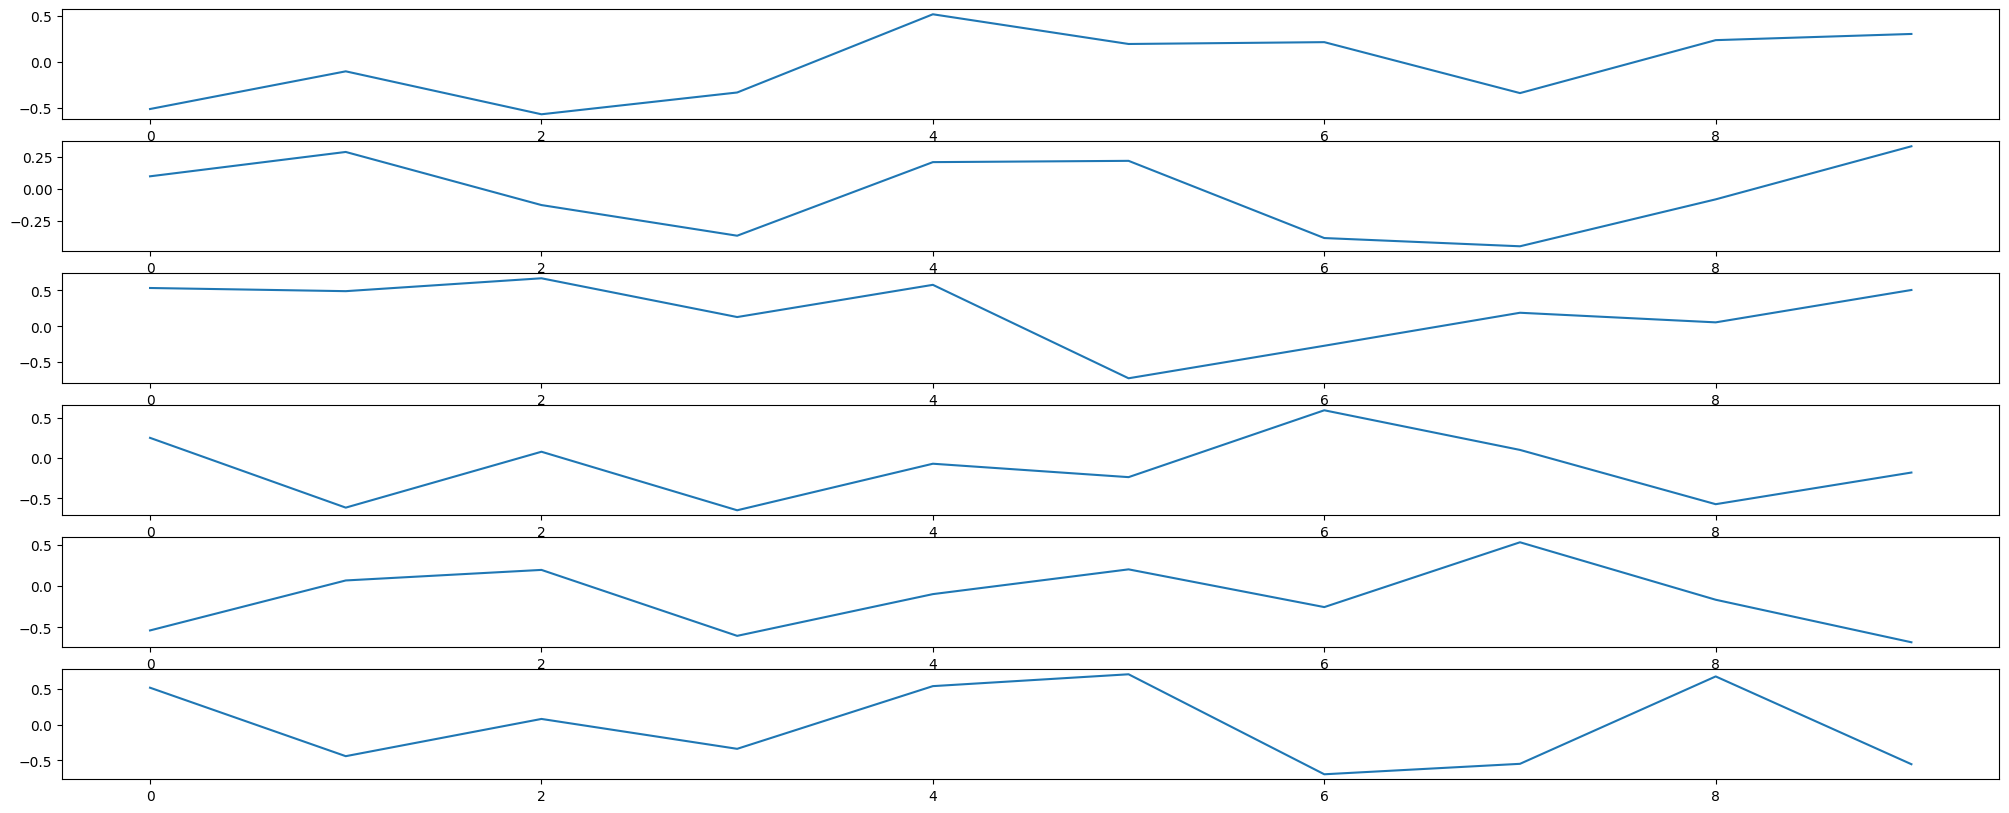

In [2]:
# Create a joint trajectory from step commands for the grub to follow
import numpy as np
ctrl_dt = 0.02
inputs = 6
total_length_seconds = .2
command_length_seconds = 0.02

joint_commands = np.zeros((int(total_length_seconds / ctrl_dt), 24))
i = 0
while i < total_length_seconds / ctrl_dt:
    command_joint0 = np.random.uniform(-.6, 0.6, (2,))
    command_joint1 = np.random.uniform(-0.75, 0.75, (4,))
    joint_commands[i:i+int(command_length_seconds/ctrl_dt), 18:20] = command_joint0
    joint_commands[i:i+int(command_length_seconds/ctrl_dt), 20:24] = command_joint1
    i += int(command_length_seconds/ctrl_dt)

np.save("/home/daniel/Documents/data/xfer_learning/sim_to_sim_baloo/baloo_paper_joint_commands.npy", joint_commands)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(6,1, figsize=(25,10))
for i in range(inputs):
    axs[i].plot(np.array(joint_commands)[:,18+i])
print(np.array(joint_commands).shape)

In [ ]:
# generate a sin wave trajectory for the robot to follow between -1 and 1 radians and save as numpy array
t = np.linspace(0, 20, other_datapoints)
sin_trajectory = np.hstack([np.zeros((6,other_datapoints)).T, np.array([np.sin(3*t + np.pi/4), np.sin(3*t)]).T])
np.save('sin_trajectory.npy', sin_trajectory)
plt.plot(sin_trajectory)
plt.gcf().set_size_inches(15, 10)
print(sin_trajectory.shape)


In [ ]:
# generate a ramp trajectory
from scipy import signal
t = np.linspace(0, 100, other_datapoints)
ramp_trajectory = np.hstack([np.zeros((6,other_datapoints)).T, np.array([signal.sawtooth(0.5*t), signal.sawtooth(0.5*t, 0.5)]).T])
np.save('ramp_trajectory.npy', ramp_trajectory)
plt.plot(ramp_trajectory)
# make figure wider
plt.gcf().set_size_inches(15, 10)
print(ramp_trajectory.shape)


(360000, 4)


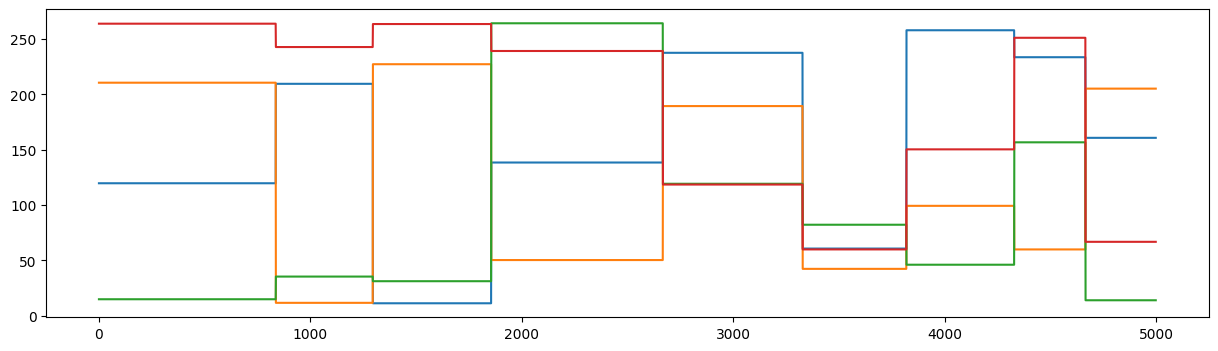

In [1]:
# generate a trajectory of random step pressure cmnds for the robot to follow and save as a numpy array
command_time_seconds = 3600
dt = 0.01

import numpy as np

p_commands = np.zeros((int(command_time_seconds / dt), 4))
i = 0
while i < command_time_seconds / dt:
    command = np.random.uniform(0, 275, (4,))
    command_length = np.random.randint(3/dt, 9/dt)
    p_commands[i:i+command_length] = command
    i += command_length

np.save('100Hz_1hr_grub_pressure_commands.npy', p_commands)
import matplotlib.pyplot as plt
plt.plot(p_commands[0:5000])
plt.gcf().set_size_inches(15, 4)
print(np.array(p_commands).shape)

(2500, 4)


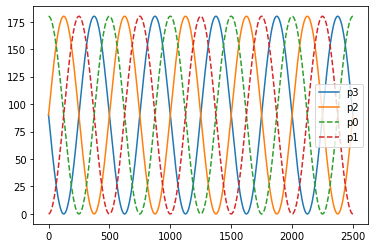

In [7]:
# generate a trajectory for 4 pressures commands that causes the joint to go in a circle
import numpy as np
import matplotlib.pyplot as plt

time_for_one_circle = 10 # seconds
num_circles = 5
dt = 0.02
t = np.linspace(0, time_for_one_circle, int(time_for_one_circle/dt))

p_commands = np.array([np.sin(2*np.pi*t/time_for_one_circle + np.pi/2), np.cos(2*np.pi*t/time_for_one_circle + np.pi), np.sin(2*np.pi*t/time_for_one_circle), np.cos(2*np.pi*t/time_for_one_circle + np.pi/2)]).T

p_commands = np.tile(p_commands, (num_circles, 1))

p_commands = (p_commands + 1) * 90

print(p_commands.shape)

plt.plot(p_commands[:, 3], label='p3')
plt.plot(p_commands[:, 2], label='p2')
plt.plot(p_commands[:, 0], label='p0', linestyle='--')
plt.plot(p_commands[:, 1], label='p1', linestyle='--')
plt.legend()

np.save('p_commands_circle.npy', p_commands)